In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
agn_dataframe = pd.read_csv('agn_dataframe.csv')

In [3]:
flag = [float('inf')]

# Converts a string into a float list.
# String must be in the following format:
# '[1.01, 2.02, 3.03, 4.04]'
# Returns an array of len=1 with the one index='inf' if the String
# cannont be converted into a list of floats.
# Takes an optional string char for the characters to split by
def convert_to_float_list(str_list, **kwargs):
    char = kwargs.get('char', None)
    debug = kwargs.get('debug', False)
    
    if debug:
        print(str_list + ' foo')
        
    str_list = str_list.replace('[', '')
    str_list = str_list.replace(']', '')
    
    if debug:
        print(str_list + ' bar')
    
    try:
        return [float(i) for i in str_list.split(char)]
    except ValueError:
        return flag

### Light curve of 0.22032 -7.1532 ZTFG

In [ ]:
agn_example = pd.read_csv('../../AGN_LightCurves/0.2032_-7.1532_ztfg.parquet')
plt.figure(figsize=[12,6])
plt.errorbar(agn_example['mjd'], agn_example['mag'], yerr=agn_example['magerr'], 
             linestyle='solid', marker='.', alpha=0.5, ecolor='0.3', label='0.2032 -7.1532 ZTFG')
plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('mag')
plt.legend()
plt.show()

### Light curve of 1.0082 70.3217 ZTFG

In [ ]:
agn_example = pd.read_csv('../../AGN_LightCurves/1.0082_70.3217_ztfg.parquet')
plt.figure(figsize=[12,6])
plt.errorbar(agn_example['mjd'], agn_example['mag'], yerr=agn_example['magerr'], 
             linestyle='solid', marker='.', alpha=0.5, ecolor='0.3', label='1.0082 70.3217 ZTFG')
plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('mag')
plt.legend()
plt.show()

### SNR, LC Length, and log Lbol

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

row = 0
# SNR vs log LBol
sns.scatterplot(data=agn_dataframe, x='SNR', y ='log_Lbol', hue='Best Fit', ax=axs[row,0])
axs[row, 0].set_xlim(0, 1500) 
# LC Length vs log LBol
sns.scatterplot(data=agn_dataframe, x='LC Length', y ='log_Lbol', hue='Best Fit', ax=axs[row,1])

row += 1
# histogram of LC Length
sns.histplot(data=agn_dataframe, x='LC Length', ax=axs[row,0])
# histogram of LC Length for best fit
sns.histplot(data=agn_dataframe, x='LC Length', hue='Best Fit', ax=axs[row,1])

row += 1
# histogram of log LBol for best fit
sns.histplot(data=agn_dataframe, x='log_Lbol', hue='Best Fit', ax=axs[row,0])
# histogram of SNR for best fit
sns.histplot(data=agn_dataframe, x='SNR', hue='Best Fit', ax=axs[row,1])
axs[row, 1].set_xlim(0, 1500) 

plt.show()

### DRW tau and amp

In [ ]:
best_fits = []
taus = []
amps = []
Lbols = []

for index, row in agn_dataframe.iterrows():
    best_fit= row['Best Fit']
    DRW_term = convert_to_float_list(row['Best DRW ARMA Fit'])
    Lbol = row['log_Lbol']
    
    taus.append(DRW_term[0])
    amps.append(DRW_term[1])
    Lbols.append(Lbol)

drw_data = pd.DataFrame({'tau': taus, 'amp': amps, 'log_Lbol': Lbols})

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

row = 0
col = 0
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='tau')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('tau')

row = 0
col = 1
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='tau')
axs[row, col].set_yscale('log')
axs[row, col].set_ylim(3.7e-1,4e-1)
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('tau')

row = 1
col = 0
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='amp')
axs[row, col].set_yscale('log')
axs[row, col].set_ylim(1, 1e100)
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('amp')

row = 1
col = 1
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='amp')
axs[row, col].set_yscale('log')
axs[row, col].set_ylim(1, 1e1)
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('amp')

plt.show()

### DHO Timescales

In [4]:
# exclude fits for which DHO_chi_sq is infinity
agn_dataframe = agn_dataframe[agn_dataframe['DHO_chi_sq'] != np.inf]

#### log_Lbol vs timescales

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
x_ax = 'log_Lbol'

# xi
row = 0
col = 0
sc = axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='xi')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(xi)')

# tau_decay
row = 0
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_decay')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decay)')

# tau_rise_dqpo
row = 1
col = 0
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_rise_dqpo')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_rise_dqpo)')

# tau_perturb
row = 1
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_perturb')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_perturb)')

# tau_decorr
row = 2
col = 0
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_decorr')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decorr)')

# omega_0
row = 2
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='omega_0')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(omega_0)')

plt.savefig('timescales_Lbol.png')

#### log_Mbh vs timescales

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
x_ax = 'log_Mbh'

# xi
row = 0
col = 0
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='xi')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(xi)')

# tau_decay
row = 0
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_decay')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decay)')

# tau_rise_dqpo
row = 1
col = 0
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_rise_dqpo')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_rise_dqpo)')

# tau_perturb
row = 1
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_perturb')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_perturb)')

# tau_decorr
row = 2
col = 0
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_decorr')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decorr)')

# omega_0
row = 2
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='omega_0')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(omega_0)')

plt.savefig('timescales_Mbh.png')

#### Colorbar

In [9]:
def color_plot(dataframe, x_ax, c_ax, name='', log_x=False, alpha=1):
    fig, axs = plt.subplots(3, 2, figsize=(16, 16))
    cm = plt.cm.get_cmap('RdYlBu')

    # xi
    row = 0
    col = 0
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='xi', c=c_ax, cmap=cm, alpha=alpha)
    fig.colorbar(sc, ax=axs[row, col])
    if log_x:
        axs[row, col].set_xscale('log')
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(xi)')

    # tau_decay
    row = 0
    col = 1
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_decay', c=c_ax, cmap=cm, alpha=alpha)
    fig.colorbar(sc, ax=axs[row, col])
    if log_x:
        axs[row, col].set_xscale('log')
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_decay)')

    # tau_rise_dqpo
    row = 1
    col = 0
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_rise_dqpo', c=c_ax, cmap=cm, alpha=alpha)
    fig.colorbar(sc, ax=axs[row, col])
    if log_x:
        axs[row, col].set_xscale('log')
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_rise_dqpo)')

    # tau_perturb
    row = 1
    col = 1
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_perturb', c=c_ax, cmap=cm, alpha=alpha)
    fig.colorbar(sc, ax=axs[row, col])
    if log_x:
        axs[row, col].set_xscale('log')
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_perturb)')

    # tau_decorr
    row = 2
    col = 0
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_decorr', c=c_ax, cmap=cm, alpha=alpha)
    fig.colorbar(sc, ax=axs[row, col])
    if log_x:
        axs[row, col].set_xscale('log')
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_decorr)')

    # omega_0
    row = 2
    col = 1
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='omega_0', c=c_ax, cmap=cm, alpha=alpha)
    fig.colorbar(sc, ax=axs[row, col])
    if log_x:
        axs[row, col].set_xscale('log')
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(omega_0)')
    
    if name != '':
        plt.savefig(f'{name}.png')

#### Timescales vs log_Lbol and DHO Terms

In [5]:
a1s = []
a2s = [] 
b0s = []
b1s = []

for index, row in agn_dataframe.iterrows():
    dho_terms = convert_to_float_list(row['DHO MCMC Fit'])
    bounds = [15, 15, 10, 10]
    
    # if dho_term > bound (same bound as in pp) then use the bound
    a1s.append(dho_terms[0] if dho_terms[0] < bounds[0] else bounds[0])
    a2s.append(dho_terms[1] if dho_terms[1] < bounds[1] else bounds[1])
    b0s.append(dho_terms[2] if dho_terms[2] < bounds[2] else bounds[2])
    b1s.append(dho_terms[3] if dho_terms[3] < bounds[3] else bounds[3])
    
dho_fit_data = pd.DataFrame({'BAT ID': agn_dataframe['BAT ID'], 'log_Lbol': agn_dataframe['log_Lbol'], 'log_Mbh': agn_dataframe['log_Mbh'],
                             'a1': a1s, 'a2': a2s, 'b0': b0s, 'b1': b1s,
                             'SNR': agn_dataframe['SNR'], 'z[OIII]_x': agn_dataframe['z[OIII]_x'], 'log_Eratio': agn_dataframe['log_Eratio'], 
                             'xi': agn_dataframe['xi'], 
                             'tau_decay': agn_dataframe['tau_decay'], 'tau_rise_dqpo': agn_dataframe['tau_rise_dqpo'], 'tau_perturb': agn_dataframe['tau_perturb'], 'tau_decorr': agn_dataframe['tau_decorr'], 
                             'omega_0': agn_dataframe['omega_0']})
dho_fit_data

,BAT ID,log_Lbol,log_Mbh,a1,a2,b0,b1,SNR,z[OIII]_x,log_Eratio,xi,tau_decay,tau_rise_dqpo,tau_perturb,tau_decorr,omega_0
0,1,44.53,6.42,0.742693,15.000000,10.000000,1.032423e+00,682.784148,0.037484,0.00,0.005435,2.692902,0.091962,3.283483e-02,0.144449,68.326007
1,4,44.58,7.85,15.000000,15.000000,10.000000,1.000000e+01,678.199206,0.039689,NaN,63.743687,14.956146,0.000920,2.361631e-01,23.494505,8.523555
2,5,45.38,NaN,2.301411,0.019597,0.231441,1.658943e+00,134.024589,0.096416,NaN,8.219890,116.998949,0.436136,7.167888e+00,184.466599,0.139990
3,6,44.80,7.29,15.000000,0.188485,3.276205,9.915132e-01,1332.673271,0.025934,-0.67,21.282623,97.989004,0.054144,3.026407e-01,154.005815,0.434148
4,28,44.63,6.93,5.198760,0.118977,0.967640,2.530884e+00,798.718882,0.022065,-0.42,7.535967,43.502442,0.193208,2.615524e+00,68.636966,0.344930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,24,44.35,NaN,15.000000,15.000000,10.000000,1.000000e+01,1211.792913,0.025434,NaN,36.513515,3.420047,0.000642,5.041347e-02,5.373204,21.348637
382,316,44.60,7.79,0.239573,0.000754,0.018741,1.741356e-09,1280.184352,0.032888,-1.36,4.360995,313.305699,4.230454,9.291800e-08,498.784621,0.027468
383,317,44.01,8.94,15.000000,7.334812,10.000000,1.000000e+01,1203.276696,0.017491,NaN,93.848543,69.302788,0.001967,1.007317e+00,108.863656,2.708286
384,318,44.77,8.12,7.690914,0.029642,0.666959,8.268291e-01,640.464361,0.089771,-1.53,22.335593,259.333867,0.130089,1.239701e+00,407.565028,0.172167


In [ ]:
color_plot(dho_fit_data, 'log_Lbol', 'a1', 'timescales_Lbol_a1')
color_plot(dho_fit_data, 'log_Lbol', 'a2', 'timescales_Lbol_a2')
color_plot(dho_fit_data, 'log_Lbol', 'b0', 'timescales_Lbol_b0')
color_plot(dho_fit_data, 'log_Lbol', 'b1', 'timescales_Lbol_b1')

In [6]:
import matplotlib
def log_color_plot(dataframe, x_ax, c_ax, name=''):
    fig, axs = plt.subplots(3, 2, figsize=(16, 16))
    cm = plt.cm.get_cmap('RdYlBu')

    # xi
    row = 0
    col = 0
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='xi', c=c_ax, cmap=cm, norm=matplotlib.colors.LogNorm())
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(xi)')

    # tau_decay
    row = 0
    col = 1
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_decay', c=c_ax, cmap=cm, norm=matplotlib.colors.LogNorm())
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_decay)')

    # tau_rise_dqpo
    row = 1
    col = 0
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_rise_dqpo', c=c_ax, cmap=cm, norm=matplotlib.colors.LogNorm())
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_rise_dqpo)')

    # tau_perturb
    row = 1
    col = 1
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_perturb', c=c_ax, cmap=cm, norm=matplotlib.colors.LogNorm())
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_perturb)')

    # tau_decorr
    row = 2
    col = 0
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_decorr', c=c_ax, cmap=cm, norm=matplotlib.colors.LogNorm())
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_decorr)')

    # omega_0
    row = 2
    col = 1
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='omega_0', c=c_ax, cmap=cm, norm=matplotlib.colors.LogNorm())
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(omega_0)')
    
    if name != '':
        plt.savefig(f'{name}.png')

In [ ]:
log_color_plot(dho_fit_data, 'log_Lbol', 'a1', 'timescales_Lbol_loga1')
log_color_plot(dho_fit_data, 'log_Lbol', 'a2', 'timescales_Lbol_loga2')
log_color_plot(dho_fit_data, 'log_Lbol', 'b0', 'timescales_Lbol_logb0')
log_color_plot(dho_fit_data, 'log_Lbol', 'b1', 'timescales_Lbol_logb1')

In [ ]:
color_plot(dho_fit_data, 'a1', 'log_Lbol', 'timescales_loga1_Lbol', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'a2', 'log_Lbol', 'timescales_loga2_Lbol', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'b0', 'log_Lbol', 'timescales_logb0_Lbol', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'b1', 'log_Lbol', 'timescales_logb1_Lbol', log_x=True, alpha=0.5)

In [ ]:
log_color_plot(dho_fit_data, 'log_Mbh', 'a1', 'timescales_Mbh_loga1')
log_color_plot(dho_fit_data, 'log_Mbh', 'a2', 'timescales_Mbh_loga2')
log_color_plot(dho_fit_data, 'log_Mbh', 'b0', 'timescales_Mbh_logb0')
log_color_plot(dho_fit_data, 'log_Mbh', 'b1', 'timescales_Mbh_logb1')

In [ ]:
color_plot(dho_fit_data, 'a1', 'log_Mbh', 'timescales_loga1_Mbh', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'a2', 'log_Mbh', 'timescales_loga2_Mbhl', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'b0', 'log_Mbh', 'timescales_logb0_Mbh', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'b1', 'log_Mbh', 'timescales_logb1_Mbh', log_x=True, alpha=0.5)

In [ ]:
color_plot(dho_fit_data, 'xi', 'log_Lbol', 'timescales_xi_Lbol_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'tau_decay', 'log_Lbol', 'timescales_tau_decay_Lbol_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'tau_rise_dqpo', 'log_Lbol', 'timescales_tau_rise_dqpo_Lbol_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'tau_perturb', 'log_Lbol', 'timescales_tau_perturb_Lbol_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'tau_decorr', 'log_Lbol', 'timescales_tau_decorr_Lbol_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'omega_0', 'log_Lbol', 'timescales_omega_0_Lbol_alpha50', log_x=True, alpha=0.5)

In [ ]:
color_plot(dho_fit_data, 'xi', 'log_Mbh', 'timescales_xi_Mbh_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'tau_decay', 'log_Mbh', 'timescales_tau_decay_Mbh_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'tau_rise_dqpo', 'log_Mbh', 'timescales_tau_rise_dqpo_Mbh_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'tau_perturb', 'log_Mbh', 'timescales_tau_perturb_Mbh_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'tau_decorr', 'log_Mbh', 'timescales_tau_decorr_Mbh_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'omega_0', 'log_Mbh', 'timescales_omega_0_Mbh_alpha50', log_x=True, alpha=0.5)

#### SNR, z[OIII], & Eratio

In [ ]:
# lob_Lbol
color_plot(agn_dataframe, 'SNR', 'log_Lbol', 'timescales_SNR_Lbol', log_x=True)
color_plot(agn_dataframe, 'z[OIII]_x', 'log_Lbol', 'timescales_z[OIII]_x_Lbol', log_x=True)
color_plot(agn_dataframe, 'log_Eratio', 'log_Lbol', 'timescales_log_Eratio_Lbol', log_x=True)

# log_Mbh
color_plot(agn_dataframe, 'SNR', 'log_Mbh', 'timescales_SNR_Mbh', log_x=True)
color_plot(agn_dataframe, 'z[OIII]_x', 'log_Mbh', 'timescales_z[OIII]_x_Mbh', log_x=True)
color_plot(agn_dataframe, 'log_Eratio', 'log_Mbh', 'timescales_log_Eratio_Mbh', log_x=True)

In [ ]:
color_plot(dho_fit_data, 'SNR', 'a1', 'timescales_SNR_loga1_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'SNR', 'a2', 'timescales_SNR_loga2_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'SNR', 'b0', 'timescales_SNR_logb0_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'SNR', 'b1', 'timescales_SNR_logb1_alpha50', log_x=True, alpha=0.5)

In [ ]:
color_plot(dho_fit_data, 'z[OIII]_x', 'a1', 'timescales_z[OIII]_x_loga1_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'z[OIII]_x', 'a2', 'timescales_z[OIII]_x_loga2_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'z[OIII]_x', 'b0', 'timescales_z[OIII]_x_logb0_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'z[OIII]_x', 'b1', 'timescales_z[OIII]_x_logb1_alpha50', log_x=True, alpha=0.5)

In [ ]:
color_plot(dho_fit_data, 'log_Eratio', 'a1', 'timescales_log_Eratio_loga1_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'log_Eratio', 'a2', 'timescales_log_Eratio_loga2_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'log_Eratio', 'b0', 'timescales_log_Eratio_logb0_alpha50', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'log_Eratio', 'b1', 'timescales_log_Eratio_logb1_alpha50', log_x=True, alpha=0.5)

#### Timescales vs redshift

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
x_ax = 'z[OIII]_x'

# xi
row = 0
col = 0
sc = axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='xi')
axs[row, col].set_yscale('log')
axs[row, col].set_xscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(xi)')

# tau_decay
row = 0
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_decay')
axs[row, col].set_yscale('log')
axs[row, col].set_xscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decay)')

# tau_rise_dqpo
row = 1
col = 0
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_rise_dqpo')
axs[row, col].set_yscale('log')
axs[row, col].set_xscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_rise_dqpo)')

# tau_perturb
row = 1
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_perturb')
axs[row, col].set_yscale('log')
axs[row, col].set_xscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_perturb)')

# tau_decorr
row = 2
col = 0
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_decorr')
axs[row, col].set_yscale('log')
axs[row, col].set_xscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decorr)')

# omega_0
row = 2
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='omega_0')
axs[row, col].set_yscale('log')
axs[row, col].set_xscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(omega_0)')

plt.savefig('timescales_z[OIII].png')

In [ ]:
# timescales vs timescales
color_plot(agn_dataframe, 'xi', 'z[OIII]_x', 'timescales_xi_z[OIII]_x', log_x=True, alpha=0.5)
color_plot(agn_dataframe, 'tau_decay', 'z[OIII]_x', 'timescales_tau_decay_z[OIII]_x', log_x=True, alpha=0.5)
color_plot(agn_dataframe, 'tau_rise_dqpo', 'z[OIII]_x', 'timescales_tau_rise_dqpo_z[OIII]_x', log_x=True, alpha=0.5)
color_plot(agn_dataframe, 'tau_perturb', 'z[OIII]_x', 'timescales_tau_perturb_z[OIII]_x', log_x=True, alpha=0.5)
color_plot(agn_dataframe, 'tau_decorr', 'z[OIII]_x', 'timescales_tau_decorr_z[OIII]_x', log_x=True, alpha=0.5)
color_plot(agn_dataframe, 'omega_0', 'z[OIII]_x', 'timescales_omega_0_z[OIII]_x', log_x=True, alpha=0.5)

In [ ]:
# dho terms
color_plot(dho_fit_data, 'z[OIII]_x', 'a1', 'timescales_z[OIII]_loga1', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'z[OIII]_x', 'a2', 'timescales_z[OIII]_loga2', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'z[OIII]_x', 'b0', 'timescales_z[OIII]_logb0', log_x=True, alpha=0.5)
color_plot(dho_fit_data, 'z[OIII]_x', 'b1', 'timescales_z[OIII]_logb1', log_x=True, alpha=0.5)

#### Fig. 3 and Fig. 10

In [ ]:
fig, axs = plt.subplots(2, figsize=(16, 16))
cm = plt.cm.get_cmap('RdYlBu')
c_ax = 'tau_decorr'
alpha = 0.5

# xi
col = 0
sc = axs[col].scatter(data=dho_fit_data, x='xi', y='omega_0', c=c_ax, cmap=cm, norm=matplotlib.colors.LogNorm(), alpha=alpha)
fig.colorbar(sc, ax=axs[col])
axs[col].set_xscale('log')
axs[col].set_yscale('log')
axs[col].set_xlabel('xi')
axs[col].set_ylabel('log(omega_0)')

col = 1
sc = axs[col].scatter(data=dho_fit_data, x='b0', y='tau_perturb', c=c_ax, cmap=cm, norm=matplotlib.colors.LogNorm(), alpha=alpha)
fig.colorbar(sc, ax=axs[col])
axs[col].set_xscale('log')
axs[col].set_yscale('log')
axs[col].set_xlabel('b0')
axs[col].set_ylabel('log(tau_perturb)')

plt.savefig('figure_3.png')

#### tau_rise vs. omega_0 line

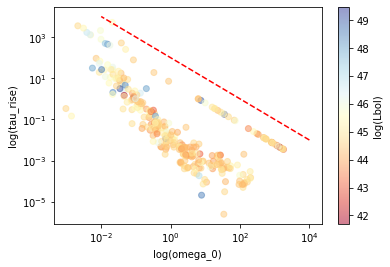

In [32]:
cm = plt.cm.get_cmap('RdYlBu')
alpha = 0.5

# xi
col = 0
sc = plt.scatter(data=agn_dataframe, x='omega_0', y='tau_rise_dqpo', c='log_Lbol', cmap=cm, alpha=alpha)
cbar = plt.colorbar(sc)
cbar.set_label('log(Lbol)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(omega_0)')
plt.ylabel('log(tau_rise)')

plt.plot([10e3, 10e-3], [10e-3, 10e3], 'r--')

plt.savefig('tau_rise_vs_omega_0.png')